## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

Clean date

In [17]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns
import os


In [18]:
df = pd.read_csv('housing_df_preprocessed.csv')



In [19]:
df.head()


,description_sold_price,description_lot_sqft,description_sqft,description_garage,description_stories,description_beds,description_year_built_decade,description_type_apartment,description_type_condo,description_type_condo_townhome_rowhome_coop,...,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer,city_encoded,state_encoded
0,129900.0,11761.0,1478.0,2.0,1.0,3.0,1990,0,0,0,...,1,1,0,0,1,0,0,0,181955.858537,182211.034314
1,88500.0,6534.0,1389.0,1.0,2.0,4.0,1940,0,0,0,...,1,0,0,0,0,1,0,0,181955.858537,182413.975490
2,145000.0,17424.0,2058.0,0.0,1.0,3.0,1960,0,0,0,...,0,1,0,0,1,0,0,0,181955.858537,182137.014706
3,65000.0,9712.0,1432.0,0.0,1.0,3.0,1950,0,0,0,...,0,0,1,0,1,0,0,0,181955.858537,182529.171569
4,169000.0,10890.0,1804.0,0.0,1.0,3.0,1980,0,0,0,...,0,0,0,0,1,0,0,0,181955.858537,182019.367647


In [20]:
df.columns = df.columns.str.replace('description_', '')
df.head()  # To verify the column names have been updated

,sold_price,lot_sqft,sqft,garage,stories,beds,year_built_decade,type_apartment,type_condo,type_condo_townhome_rowhome_coop,...,hardwood_floors,laundry_room,recreation_facilities,shopping,single_story,two_or_more_stories,view,washer_dryer,city_encoded,state_encoded
0,129900.0,11761.0,1478.0,2.0,1.0,3.0,1990,0,0,0,...,1,1,0,0,1,0,0,0,181955.858537,182211.034314
1,88500.0,6534.0,1389.0,1.0,2.0,4.0,1940,0,0,0,...,1,0,0,0,0,1,0,0,181955.858537,182413.975490
2,145000.0,17424.0,2058.0,0.0,1.0,3.0,1960,0,0,0,...,0,1,0,0,1,0,0,0,181955.858537,182137.014706
3,65000.0,9712.0,1432.0,0.0,1.0,3.0,1950,0,0,0,...,0,0,1,0,1,0,0,0,181955.858537,182529.171569
4,169000.0,10890.0,1804.0,0.0,1.0,3.0,1980,0,0,0,...,0,0,0,0,1,0,0,0,181955.858537,182019.367647


### Linear regresion

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [42]:
# 'sold_price' is the target variable
X = df.drop('sold_price', axis=1)  # All features except 'sold_price'
y = df['sold_price']  # Target variable

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fix valuable NaN

In [44]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean value of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_train)

In [47]:
mse = mean_absolute_percentage_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mmean_absolute_percentage_error: {mse}")
print(f"R-squared: {r2}")

Mmean_absolute_percentage_error: 0.5976761521584326
R-squared: 0.4186926292465877


In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean_absolute_percentage_error: {mse}")
print(f"R-squared: {r2}")

mean_absolute_percentage_error: 0.6399329910681467
R-squared: 0.32930769675007165


In [51]:
mean_absolute_percentage_error(y_test,np.mean(y)*np.ones_like(y_test))

1.321557388765848

In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                    Coefficient
lot_sqft                              -0.000372
sqft                                 126.852217
garage                             19766.699258
stories                            32373.762965
beds                              -17520.980959
year_built_decade                      7.986340
type_apartment                     97478.635809
type_condo                            -0.001622
type_condo_townhome_rowhome_coop  150180.670592
type_condos                        36453.054642
type_duplex_triplex                83998.056821
type_land                          34203.012580
type_mobile                      -168329.769016
type_multi_family                -139329.268335
type_other                            -0.000022
type_single_family                -23935.995868
type_townhomes                    -70718.395052
total_baths                       119218.302709
basement                           61270.119323
central_air                        11331

Model has a relatively high Mean Squared Error (MSE) and a relatively low R-squared value (about 0.33), meaning the model explains around 33% of the variance in the target variable (sold_price). This suggests that the model could potentially be improved. 

In [14]:
print(df.isnull().sum())

sold_price                          0
lot_sqft                            0
sqft                                0
garage                              0
stories                             0
beds                                0
year_built_decade                   0
type_apartment                      0
type_condo                          0
type_condo_townhome_rowhome_coop    0
type_condos                         0
type_duplex_triplex                 0
type_land                           0
type_mobile                         0
type_multi_family                   0
type_other                          0
type_single_family                  0
type_townhomes                      0
total_baths                         0
basement                            0
central_air                         0
central_heat                        0
community_outdoor_space             0
community_security_features         0
dining_room                         0
dishwasher                          0
family_room 

In [15]:
df = df.dropna()

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  #  use 'median', .
X_imputed = imputer.fit_transform(X)

In [17]:
print(df.dtypes)

sold_price                          float64
lot_sqft                            float64
sqft                                float64
garage                              float64
stories                             float64
beds                                float64
year_built_decade                     int64
type_apartment                        int64
type_condo                            int64
type_condo_townhome_rowhome_coop      int64
type_condos                           int64
type_duplex_triplex                   int64
type_land                             int64
type_mobile                           int64
type_multi_family                     int64
type_other                            int64
type_single_family                    int64
type_townhomes                        int64
total_baths                         float64
basement                              int64
central_air                           int64
central_heat                          int64
community_outdoor_space         

In [18]:
df_cleaned = df.dropna()  # Drop rows with any missing values
X = df_cleaned.drop('sold_price', axis=1)
y = df_cleaned['sold_price']

In [19]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

## Feature Selection - STRETCH

Feature Scaling

In [20]:
# 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Mean Squared Error (scaled): {mse_scaled}")
print(f"R-squared (scaled): {r2_scaled}")

Mean Squared Error (scaled): 128519731578.7724
R-squared (scaled): 0.45455643490244957


Improved model's performance with the scaled data:
Mean Squared Error (MSE): 128,519,731,578, which has decreased compared to the previous unscaled model.
R-squared: 0.454, indicating that model now explains about 45.5% of the variance in the target variable (sold_price), up from the previous 33%.

## Feature Selection - STRETCH

Polynomial Features

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error (poly): {mse_poly}")
print(f"R-squared (poly): {r2_poly}")

Mean Squared Error (poly): 62571275265.727646
R-squared (poly): 0.7344446721574405


Significantly improved the model's performance by introducing polynomial features:
Mean Squared Error (MSE): 62,571,275,265, which is much lower than the previous scaled model.
R-squared: 0.734, meaning that the model now explains around 73.4% of the variance in the target variable (sold_price).

## Feature Selection - STRETCH

Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MSE (Ridge): {mse_ridge}')
print(f'R-squared (Ridge): {r2_ridge}')

MSE (Ridge): 228253195403.97916
R-squared (Ridge): 0.0312830946916034


Ridge regression model has significantly worsened the performance, with a much higher Mean Squared Error (MSE) and a very low R-squared (close to 0, indicating poor predictive power).

## Feature Selection - STRETCH

Improve Ridge Regression Performance

In [23]:
from sklearn.linear_model import RidgeCV

# Try different alpha values
alphas = [0.01, 0.1, 1.0, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_poly, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test_poly)

mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)

print(f"Optimal Alpha: {ridge_cv.alpha_}")
print(f'MSE (Ridge CV): {mse_ridge_cv}')
print(f'R-squared (Ridge CV): {r2_ridge_cv}')

c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.99411e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.48093e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55924e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Optimal Alpha: 100.0
MSE (Ridge CV): 58405491291.27205
R-squared (Ridge CV): 0.7521244481306778


Ridge Regression (with Cross-Validation):
MSE: 58,405,491,291
R-squared: 0.752
This shows that Ridge regression with an optimal alpha value of 100.0 performs well, explaining 75.2% of the variance.

## Feature Selection - STRETCH

Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'MSE (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

MSE (Lasso): 45452490950.17368
R-squared (Lasso): 0.807097568584389


c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.803e+13, tolerance: 1.413e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression:
MSE: 45,452,490,950
R-squared: 0.807
Lasso regression is the best-performing model so far, explaining 80.7% of the variance, and has the lowest MSE.

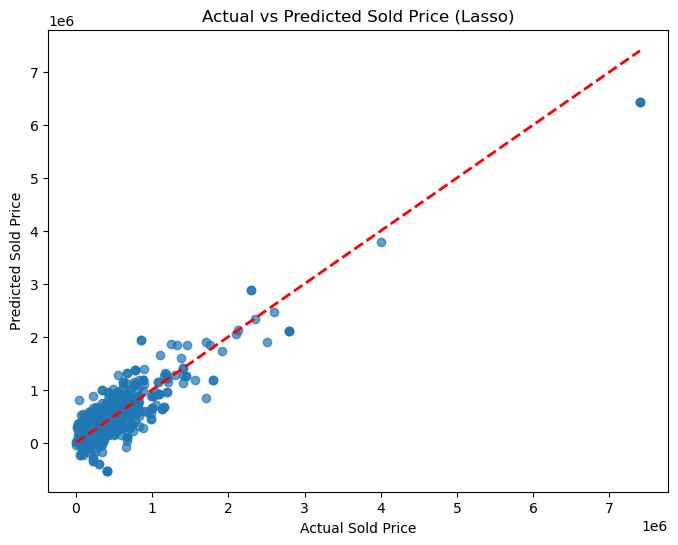

In [25]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')
plt.title('Actual vs Predicted Sold Price (Lasso)')
plt.show()

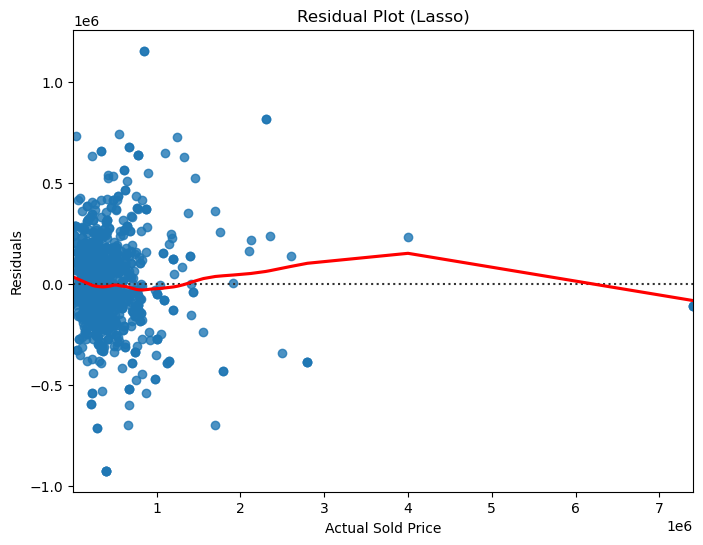

In [26]:
import seaborn as sns

# Residual Plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred_lasso, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Actual Sold Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso)')
plt.show()

c:\Users\a7902\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


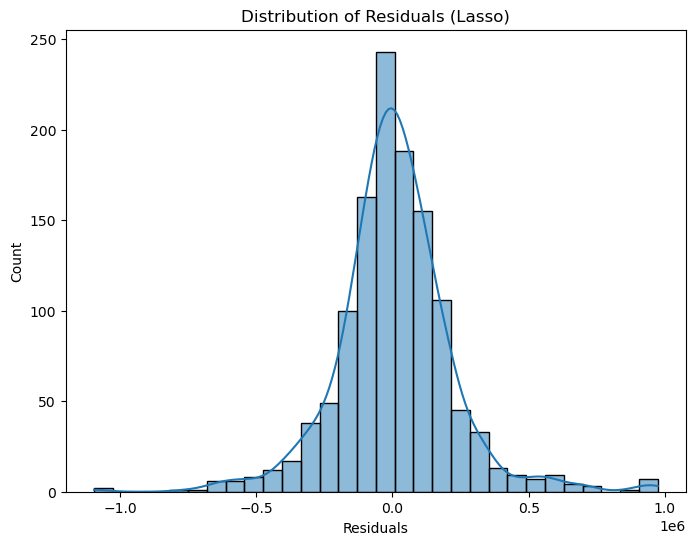

In [27]:
# Distribution of Residuals
plt.figure(figsize=(8,6))
sns.histplot((y_test - y_pred_lasso), bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (Lasso)')
plt.show()

## Print Model In JSON File

In [28]:
import json
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dataset, and you have loaded it
# Split data into features (X) and target variable (y)
X = df.drop('sold_price', axis=1)
y = df['sold_price']

# Create polynomial features (optional, if using polynomial regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split into training and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)

# Save the model coefficients and intercept to a dictionary
lasso_model_data = {
    "coefficients": lasso_model.coef_.tolist(),  # Convert numpy array to list
    "intercept": lasso_model.intercept_.tolist() # Convert numpy value to list
}

# Save the dictionary to a JSON file
with open('lasso_model.json', 'w') as json_file:
    json.dump(lasso_model_data, json_file)

print("Lasso model saved to lasso_model.json")

Lasso model saved to lasso_model.json


c:\Users\a7902\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.803e+13, tolerance: 1.413e+11
  model = cd_fast.enet_coordinate_descent(


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
# Example feature and target separation
X = df.drop('sold_price', axis=1)  # Features
y = df['sold_price']  # Target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

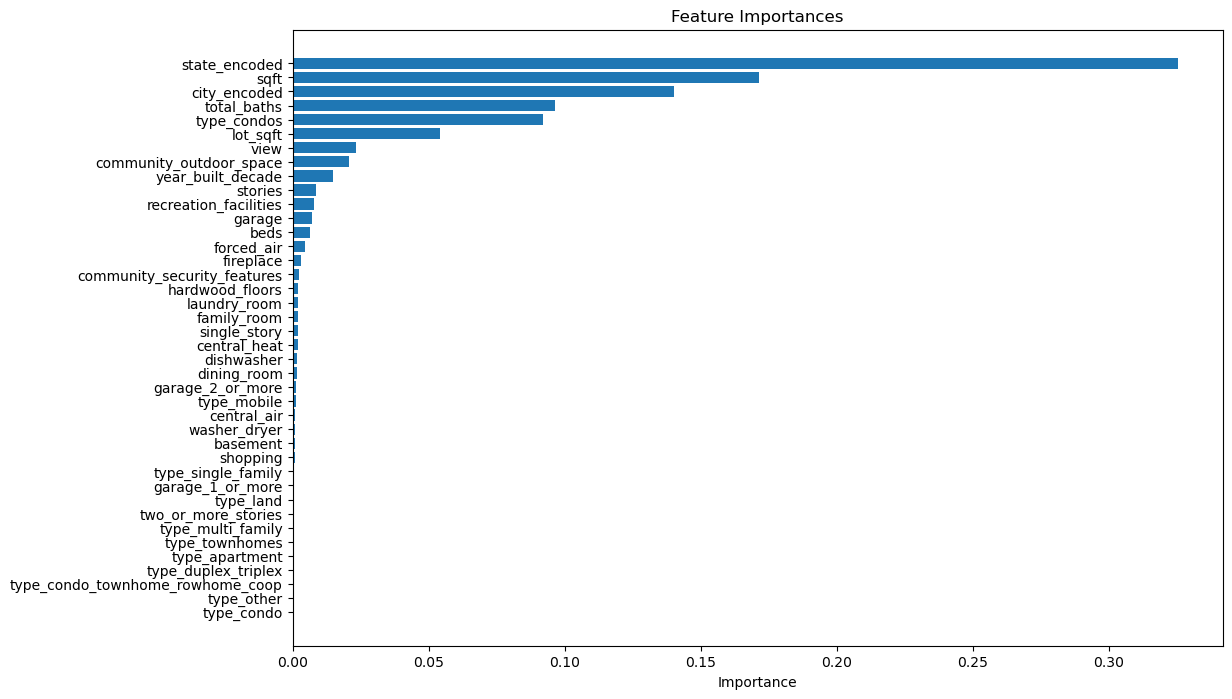

In [33]:
importances = rf.feature_importances_
features = X.columns  # Ensure X.columns matches the feature names used

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 9287.364592169657
Mean Squared Error: 1401589376.3799238
R^2 Score: 0.9940515911691976


Metrics suggest that Random Forest model is performing very well:
Mean Absolute Error (MAE): $9,287.36. This represents the average absolute difference between the predicted and actual sale prices. A lower value indicates better performance.

Mean Squared Error (MSE): $1,401,589,376.38. This metric penalizes larger errors more heavily. A lower value is preferable, but since has a high R² score, this indicates that even though MSE is large, the model explains a significant proportion of the variance.

R² Score: 0.994. This indicates that approximately 99.4% of the variance in the sale price is explained by the model. This is an excellent result, suggesting that model fits the data very well.

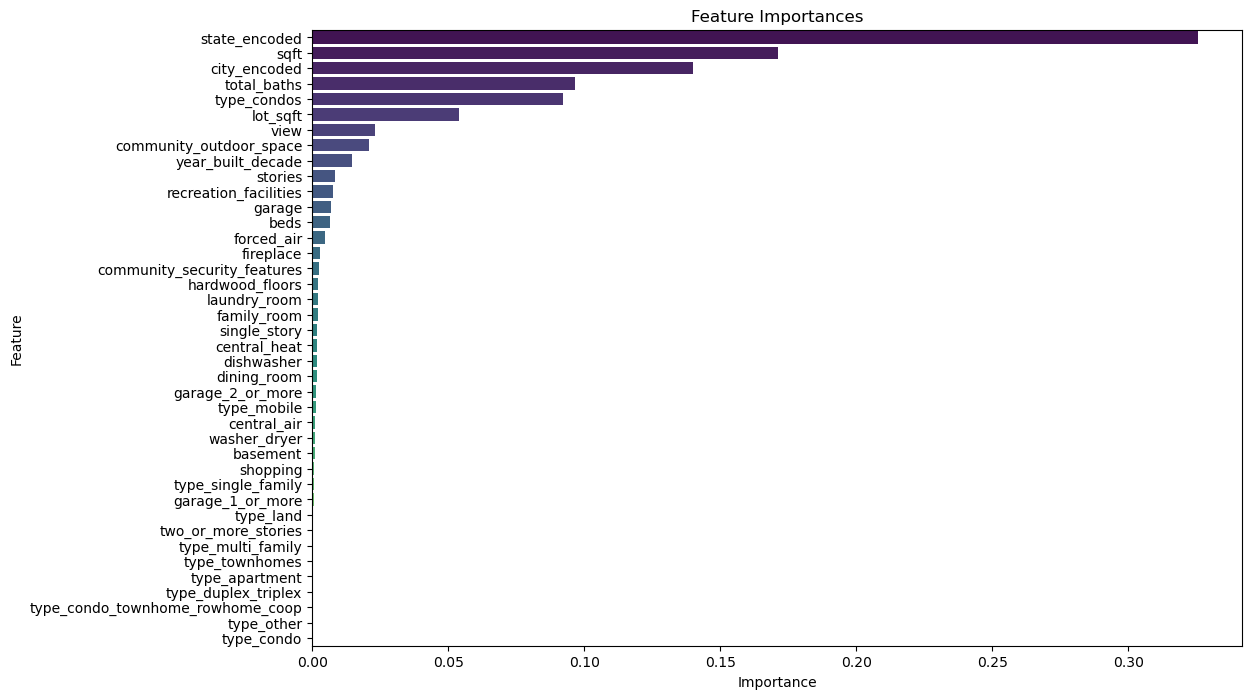

In [35]:
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

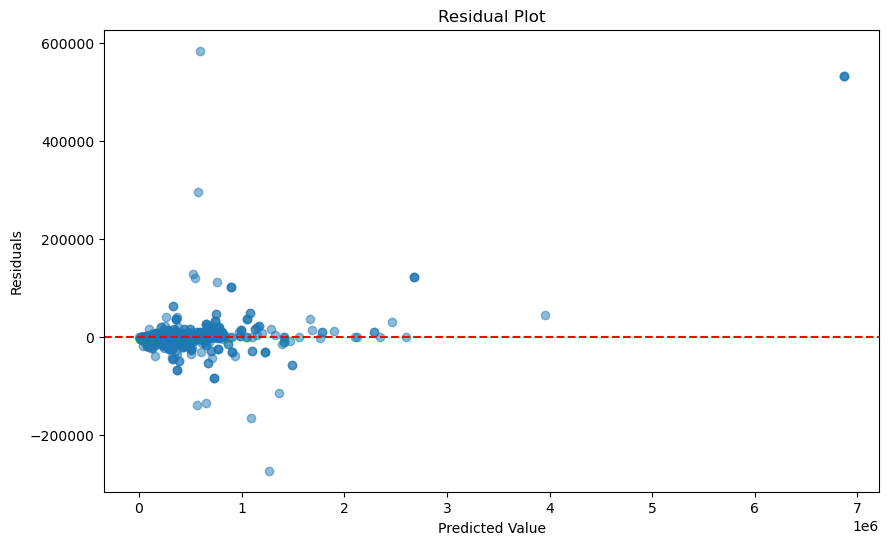

In [36]:
import numpy as np

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

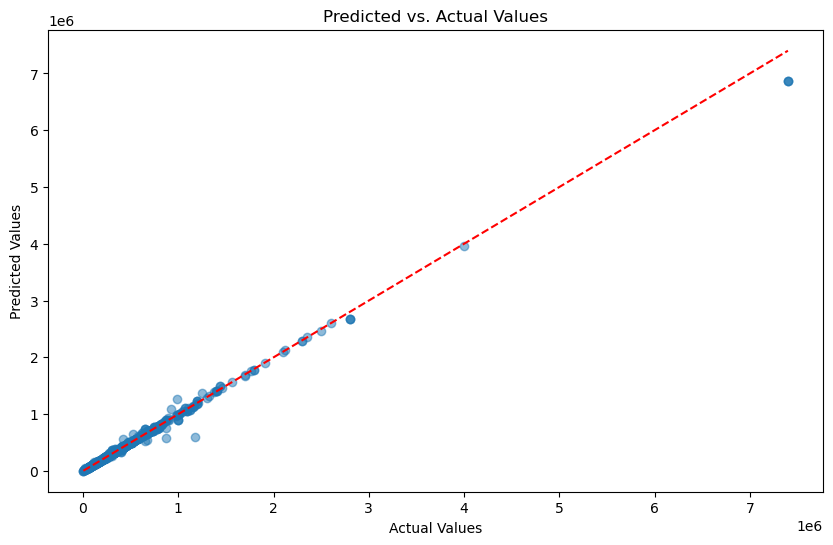

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

c:\Users\a7902\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


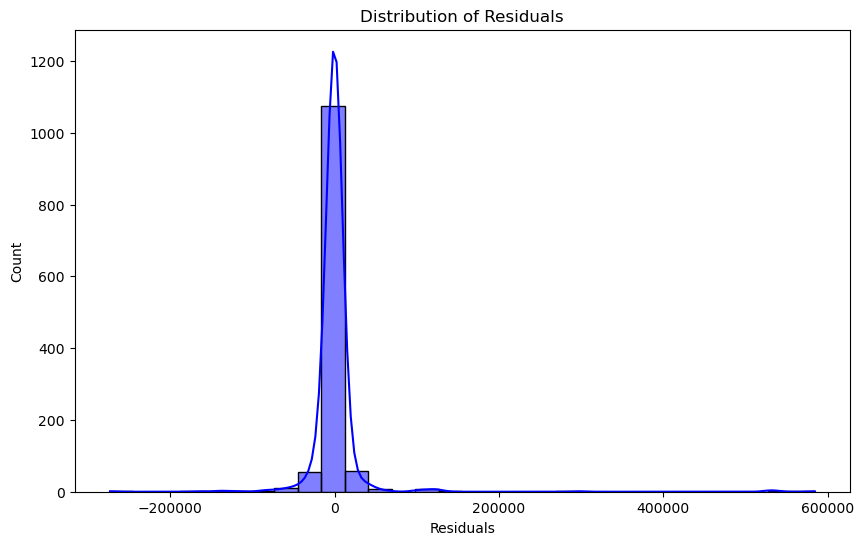

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

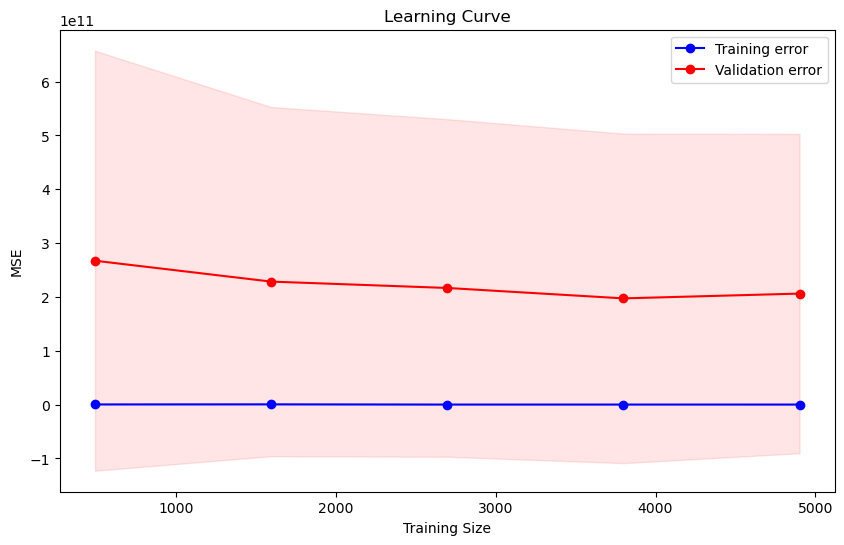

In [39]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Feature Selection - STRETCH

### RandomizedSearchCV for hyperparameter tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [54]:
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [55]:
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to try
    cv=5,        # Number of cross-validation folds
    verbose=2,   # Verbosity level
    random_state=42,
    n_jobs=-1     # Use all available cores
)

In [56]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000231ADB244D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000231B37C5C90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000231B3881910>},
                   random_state=42, verbose=2)

In [57]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f'Best Parameters: {best_params}')

Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 494}


In [58]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 9514.22494371202
Mean Squared Error: 1609178496.6990328
R^2 Score: 0.9931705735350073


Results indicate that model is still performing very well after using RandomizedSearchCV for hyperparameter tuning:

Mean Absolute Error (MAE): $9,514.22. This represents the average absolute difference between predicted and actual values. It's a bit higher than before but still quite reasonable.

Mean Squared Error (MSE): $1,609,178,496.70. This value is also higher compared to the previous model, but as with MAE, it is expected to increase slightly with more parameter exploration.

R² Score: 0.993. This indicates that approximately 99.3% of the variance in the sale price is explained by the model, which is still an excellent result.

### Xgboost

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame and 'sold_price' is your target variable
X = df.drop('sold_price', axis=1)
y = df['sold_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = xgb.XGBRegressor()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
importances = model.feature_importances_
print("Feature importances:", importances)

Mean Squared Error: 730402343.4912397
Feature importances: [2.3730928e-03 2.4806302e-02 3.3023767e-03 6.0414529e-04 2.1424405e-03
 2.5300307e-03 0.0000000e+00 0.0000000e+00 7.4943085e-04 7.2746909e-01
 0.0000000e+00 1.2922609e-03 6.8802633e-03 3.7645487e-04 0.0000000e+00
 1.3040942e-03 4.0243129e-04 9.6063681e-02 1.4328402e-03 1.2310138e-03
 1.4482861e-03 8.0513069e-04 4.9573756e-03 4.5521159e-04 1.8856033e-03
 7.0374022e-04 2.7885486e-03 5.1443797e-04 1.4184675e-03 4.4243637e-02
 2.7718991e-03 1.5324865e-03 6.4115121e-04 2.9527972e-04 2.2624290e-04
 1.2721273e-03 1.6790760e-03 2.1017233e-03 3.8915038e-02 1.8384689e-02]


## Feature Selection - STRETCH

Code for Hyperparameter Tuning with GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize XGBoost Regressor
model = xgb.XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 612353119.3744673


Optimized hyperparameters improved your model’s performance:

Learning Rate: 0.2
Max Depth: 6
Number of Estimators: 300
Subsample: 1.0
The new score is lower than the initial Mean Squared Error, which indicates an improvement.

In [42]:
# Initialize XGBoost Regressor with best parameters
best_model = xgb.XGBRegressor(
    learning_rate=0.2,
    max_depth=6,
    n_estimators=300,
    subsample=1.0
)

# Train model
best_model.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Updated Mean Squared Error: {mse}")

Updated Mean Squared Error: 534180808.16074896


In [43]:
importances = best_model.feature_importances_
print("Updated Feature Importances:", importances)

Updated Feature Importances: [1.7559290e-03 1.5582188e-02 3.3032626e-03 1.0305190e-03 1.2680948e-03
 1.8539071e-03 2.3460710e-04 0.0000000e+00 0.0000000e+00 7.7809209e-01
 0.0000000e+00 3.1841833e-03 1.3029922e-02 3.3365699e-04 0.0000000e+00
 1.7375329e-03 1.2175311e-04 8.0962032e-02 7.2084146e-04 1.2689695e-03
 3.3673499e-04 2.6210566e-04 2.9125754e-03 7.2624168e-04 1.5646290e-03
 7.3467731e-04 2.5862467e-03 5.1166129e-04 7.7441084e-04 3.1279363e-02
 2.3691470e-03 5.5182591e-04 2.7287178e-04 1.1017357e-04 2.5503131e-04
 4.2341443e-04 1.6584978e-03 1.3611746e-03 3.1441376e-02 1.5388317e-02]


In [44]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validated MSE:", -cv_scores.mean())

Cross-Validated MSE: 215640555688.72604


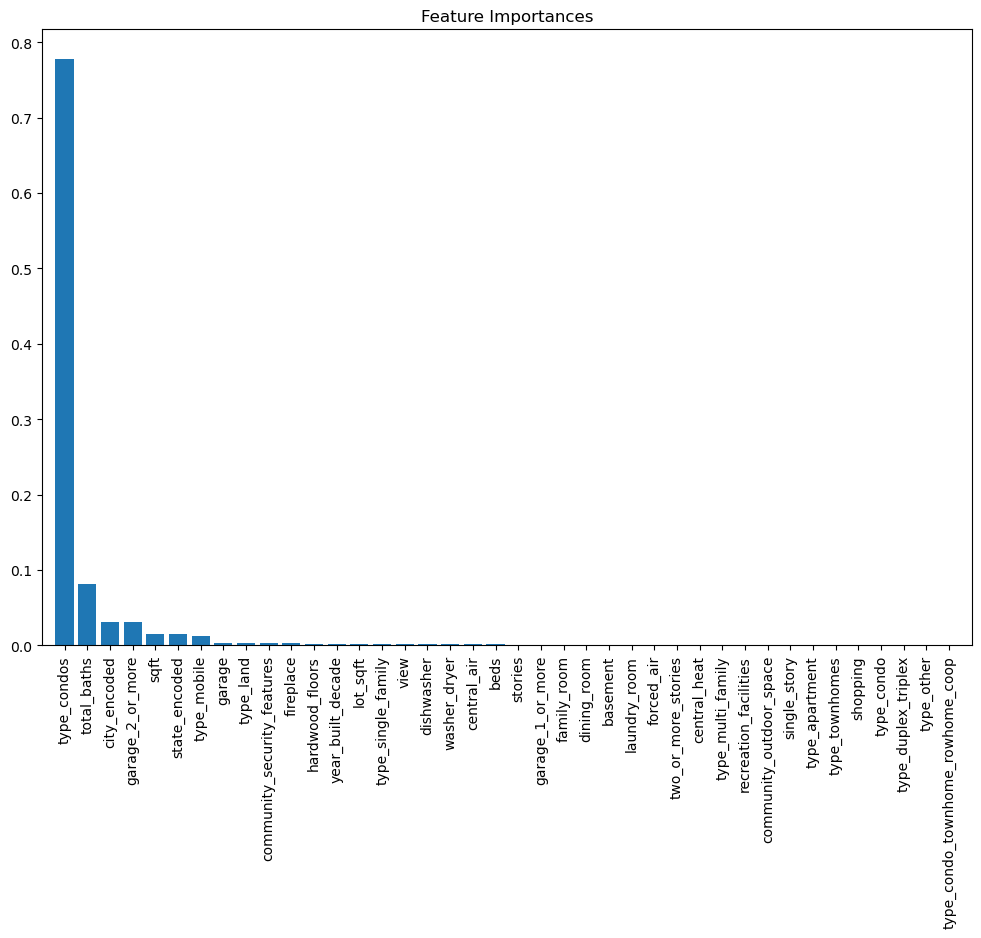

In [45]:
import matplotlib.pyplot as plt

# Get feature names
features = X.columns

# Create feature importance plot
plt.figure(figsize=(12, 8))
importances = best_model.feature_importances_
indices = importances.argsort()[::-1]
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

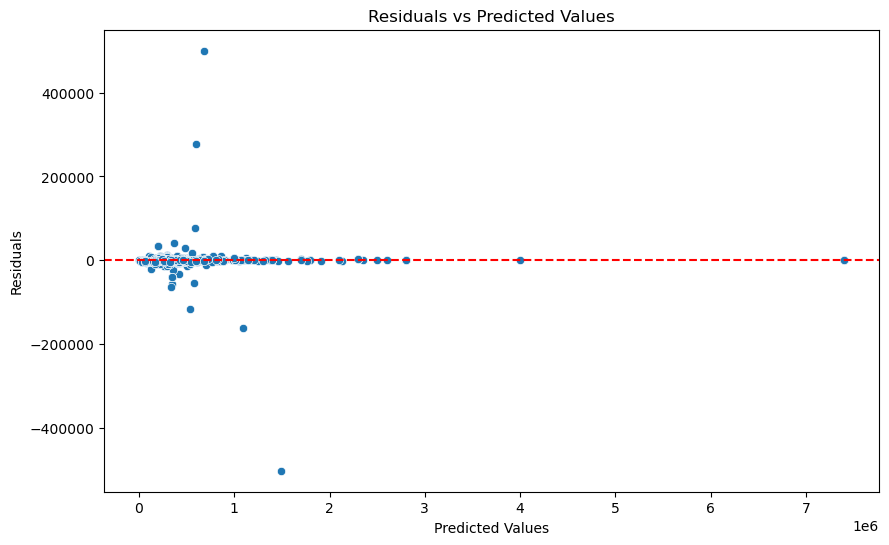

In [46]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

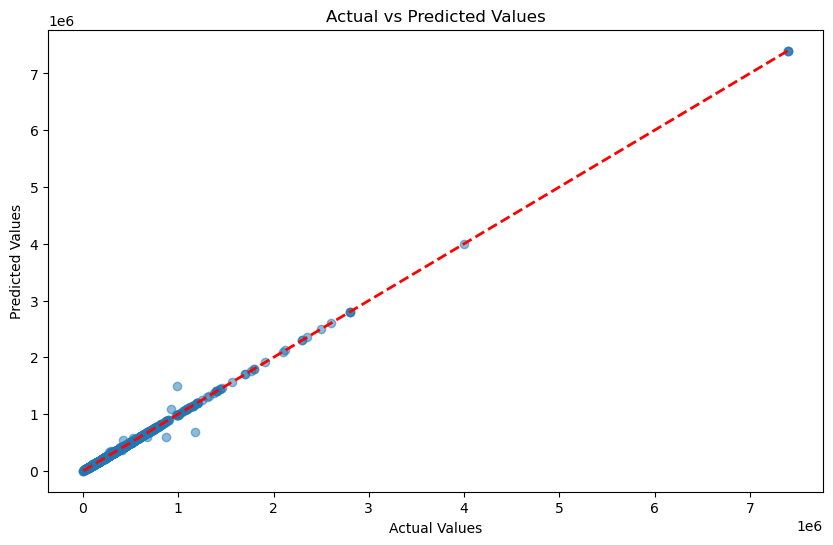

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

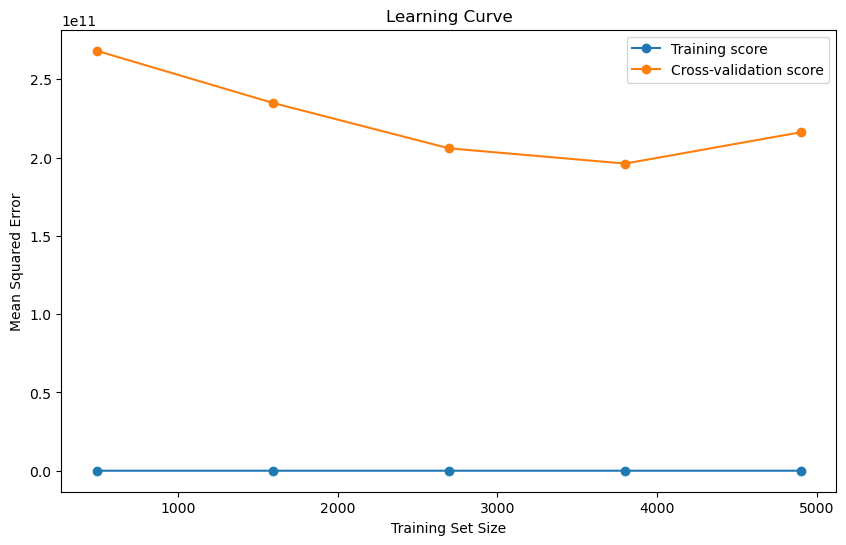

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [49]:
import pandas as pd

# Define metrics for each model
metrics = {
    'Model': ['Linear Regression (Lasso)', 'Random Forest', 'XGBoost'],
    'Mean Squared Error': [45452490950.17368, 1401589376.3799238, 534180808.16074896],
    'R^2 Score': [0.807097568584389, 0.9940515911691976, None],  # XGBoost R^2 not provided
    'Mean Absolute Error': [None, 9287.364592169657, None],  # MAE only provided for Random Forest
    'Cross-Validated MSE': [None, None, 215640555688.72604]  # Cross-Validated MSE only for XGBoost
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

                       Model  Mean Squared Error  R^2 Score  \
0  Linear Regression (Lasso)        4.545249e+10   0.807098   
1              Random Forest        1.401589e+09   0.994052   
2                    XGBoost        5.341808e+08        NaN   

   Mean Absolute Error  Cross-Validated MSE  
0                  NaN                  NaN  
1          9287.364592                  NaN  
2                  NaN         2.156406e+11  


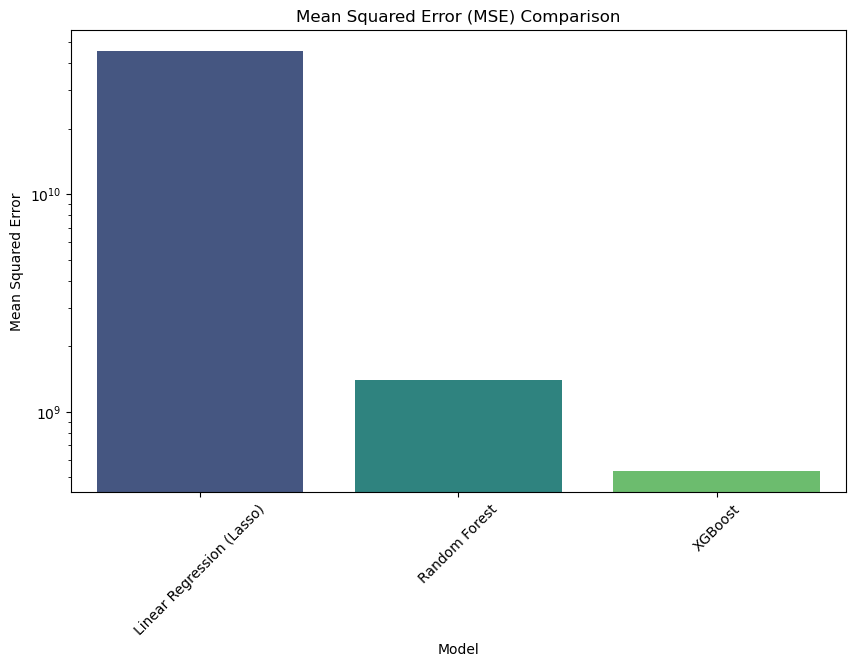

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
mse_data = {
    'Model': ['Linear Regression (Lasso)', 'Random Forest', 'XGBoost'],
    'Mean Squared Error': [45452490950.17368, 1401589376.3799238, 534180808.16074896]
}

mse_df = pd.DataFrame(mse_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Squared Error', data=mse_df, palette='viridis')
plt.yscale('log')  # Use log scale to better visualize large differences
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

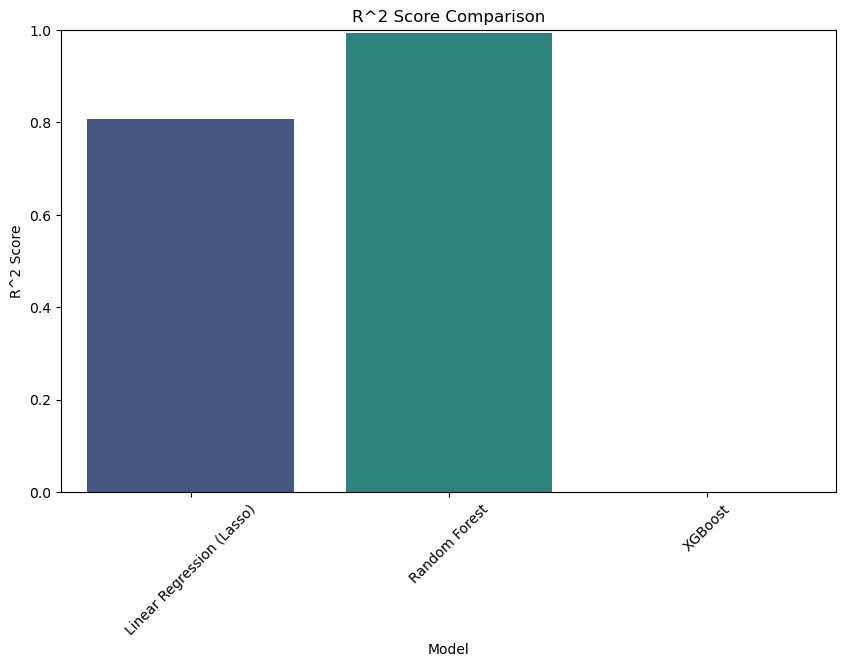

In [51]:
# Data for plotting
r2_data = {
    'Model': ['Linear Regression (Lasso)', 'Random Forest', 'XGBoost'],
    'R^2 Score': [0.807097568584389, 0.9940515911691976, None]
}

r2_df = pd.DataFrame(r2_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2 Score', data=r2_df, palette='viridis')
plt.title('R^2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # R^2 scores range between 0 and 1
plt.xticks(rotation=45)
plt.show()

Summary
Best Model (Overall): Random Forest shows the highest R-squared value and relatively lower MAE and MSE compared to the others, indicating it performs well overall.
Best Model for Minimizing Error: XGBoost has the lowest updated MSE, but the cross-validated MSE suggests potential overfitting or issues with model generalization.
Lasso Regression: While it has a relatively high MSE and lower R-squared, it might still be useful in cases where interpretability and feature selection are more important than prediction accuracy.

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [52]:
# We incorporate various models (Linear Regression (Lasso), Random Forest, XGBoost) with the aim of optimizing performance to achieve the best results.